Saving Sample - Superstore.csv to Sample - Superstore (8).csv


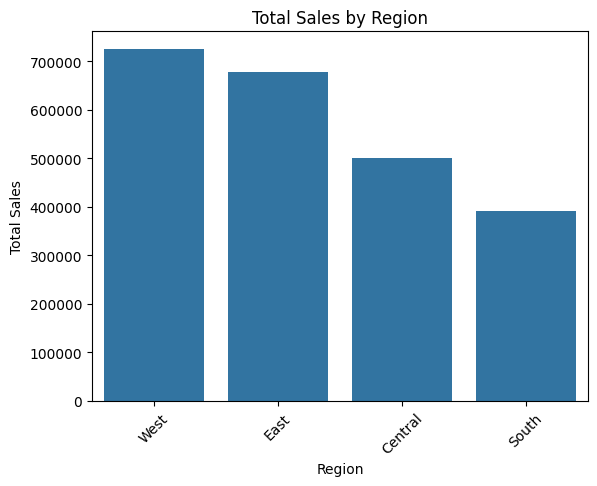

/tmp/ipython-input-9-2322655437.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_profit.index, y=category_profit.values, palette='Set2')


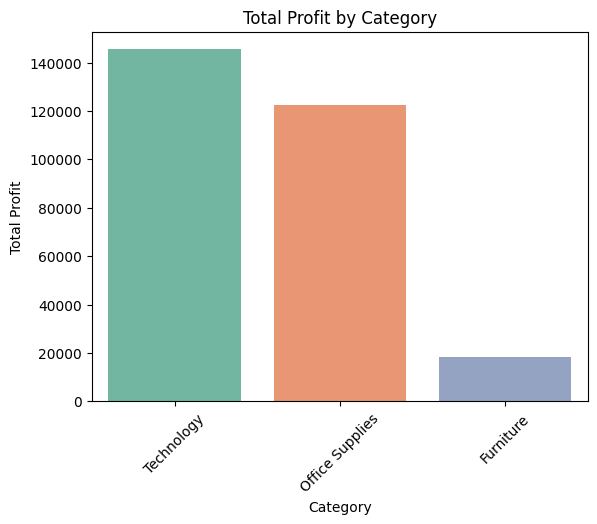

/tmp/ipython-input-9-2322655437.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loss_items.index, y=loss_items.values, palette='viridis')


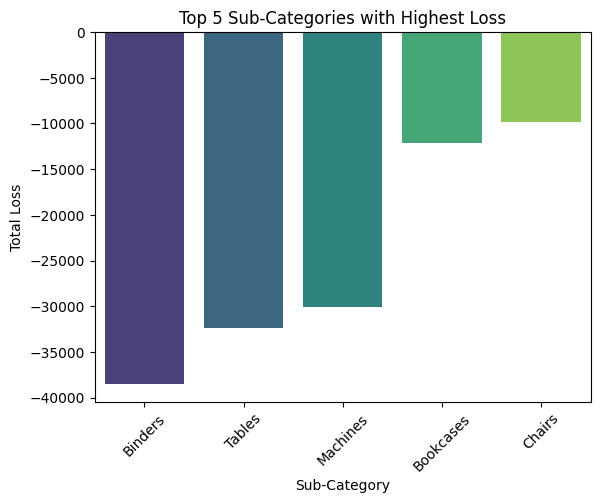

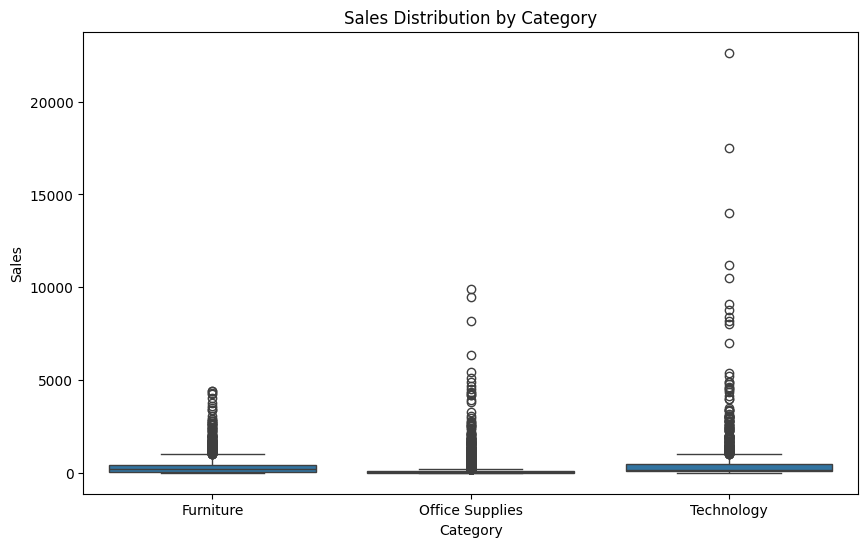

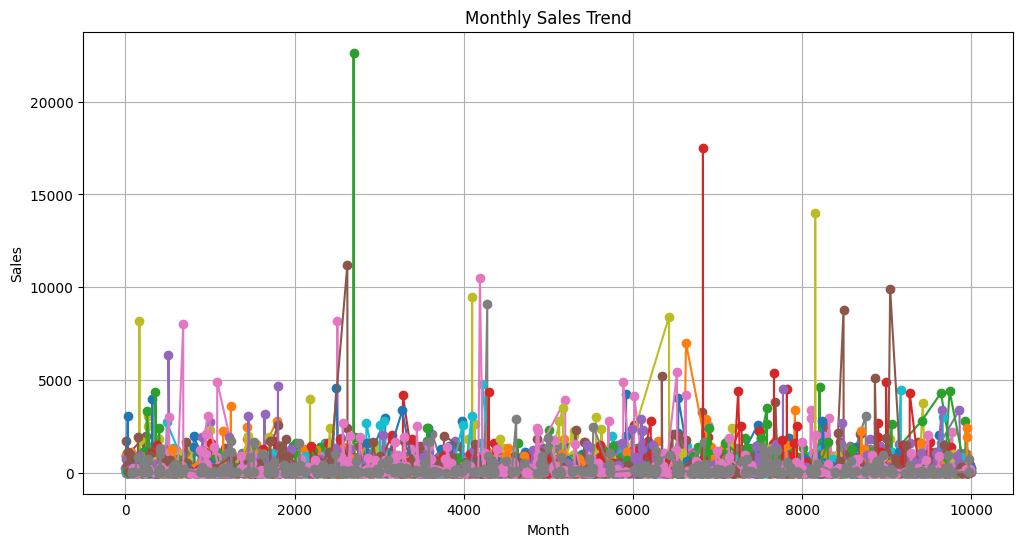

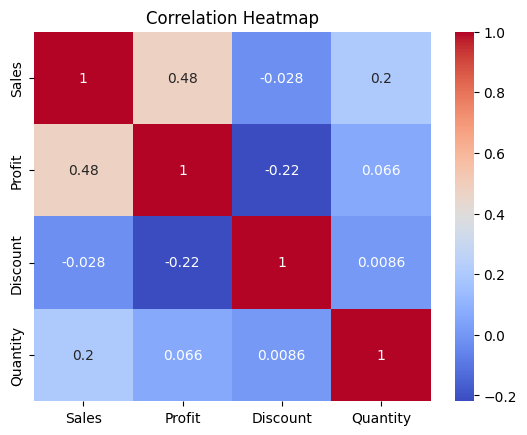

                    Sales
Segment                  
Consumer     1.161401e+06
Corporate    7.061464e+05
Home Office  4.296531e+05


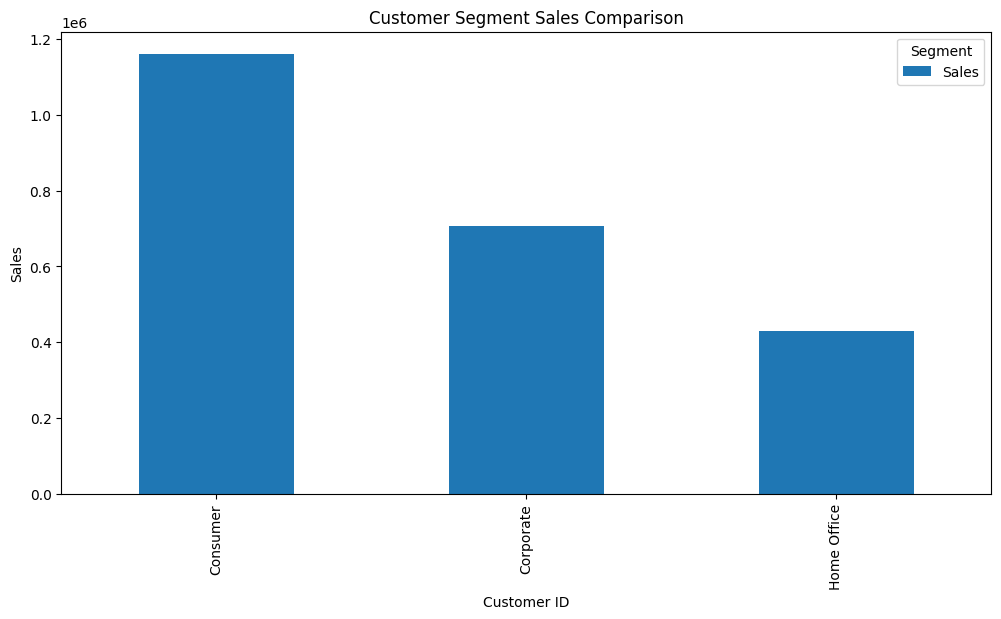

In [9]:
from google.colab import files
uploaded= files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')

region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)

sns.barplot(x=category_profit.index, y=category_profit.values, palette='Set2')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

loss_items = df[df['Profit'] < 0].groupby('Sub-Category')['Profit'].sum().sort_values().head(5)

sns.barplot(x=loss_items.index, y=loss_items.values, palette='viridis')
plt.title('Top 5 Sub-Categories with Highest Loss')
plt.xlabel('Sub-Category')
plt.ylabel('Total Loss')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

df['Order Date'] = pd.to_datetime(df['Order Date'])

monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales']


monthly_sales.plot(kind='line', figsize=(12,6), marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

corr= df[['Sales','Profit','Discount','Quantity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

customer_segment = pd.pivot_table(df, values='Sales', index='Segment', aggfunc='sum')
print(customer_segment)

customer_segment.plot(kind='bar', figsize=(12,6))
plt.title('Customer Segment Sales Comparison')
plt.xlabel('Customer ID')
plt.ylabel('Sales')
plt.legend(title='Segment')
plt.show()
